In [1]:
import os
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model_conv = VGG16(weights='imagenet', input_shape=(150, 150, 3), include_top=False)

In [3]:
model_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
data_generator = ImageDataGenerator(
    rescale=1.0/255.0,
)
generator = data_generator.flow_from_directory(
    'PetImages',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1190 images belonging to 2 classes.


In [5]:
data_generator_test = ImageDataGenerator(
    rescale=1.0/255.0,
)
generator_test = data_generator_test.flow_from_directory(
    'PetImagesTest/',
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary'
)

Found 1399 images belonging to 2 classes.


In [6]:
from tensorflow.keras import models, layers, optimizers

In [7]:
model_conv.trainable = False

In [8]:
model = models.Sequential()
model.add(model_conv)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
history = model.fit(generator, steps_per_epoch=50, epochs=3, validation_data=generator_test, validation_steps=30)

Epoch 1/3
50/50 [==============================] - 71s 1s/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.5418 - val_accuracy: 0.8433
Epoch 2/3
50/50 [==============================] - 75s 1s/step - loss: 0.0412 - accuracy: 0.9830 - val_loss: 0.5587 - val_accuracy: 0.8133
Epoch 3/3
50/50 [==============================] - 73s 1s/step - loss: 0.0310 - accuracy: 0.9929 - val_loss: 0.4896 - val_accuracy: 0.8600


In [16]:
import tensorflow.keras.utils as utils
img = utils.load_img(
    'PetImagesTest/Cat/11751.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=(150, 150),
    interpolation='nearest',
    keep_aspect_ratio=False
)

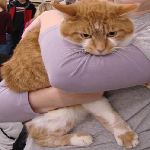

In [17]:
img

In [18]:
img = utils.img_to_array(img)
img.shape

(150, 150, 3)

In [1]:
import cv2
import numpy as np

def add_rain(photo_path, output_path):
    # Load the photo
    photo = cv2.imread(photo_path)

    # Create a random noise image with the same shape as the photo
    noise = np.random.randint(0, 256, photo.shape, dtype=np.uint8)

    # Create a binary mask for the raindrops
    threshold = 220
    rain_mask = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    _, rain_mask = cv2.threshold(rain_mask, threshold, 255, cv2.THRESH_BINARY)

    # Apply the rain effect by blending the photo and the noise using the rain mask
    rain_effect = cv2.bitwise_and(noise, noise, mask=rain_mask)
    output = cv2.addWeighted(photo, 1, rain_effect, 0.8, 0)

    # Save the output image
    cv2.imwrite(output_path, output)

    print("Rain effect added successfully!")


# Usage example
photo_path = "download.png"
output_path = "rainy.png"

add_rain(photo_path, output_path)

Rain effect added successfully!


In [2]:
import numpy as np
from PIL import Image, ImageDraw

def add_rain(image_path, output_path):
    # Load the image
    image = Image.open(image_path).convert("RGBA")
    width, height = image.size

    # Create a transparent overlay for raindrops
    overlay = Image.new("RGBA", (width, height), (0, 0, 0, 0))
    draw = ImageDraw.Draw(overlay)

    # Generate random raindrops
    num_drops = 500
    for _ in range(num_drops):
        x = np.random.randint(0, width)
        y = np.random.randint(0, height)
        length = np.random.randint(5, 20)
        color = (200, 200, 200, np.random.randint(50, 150))

        draw.line((x, y, x, y + length), fill=color, width=1)

    # Blend the raindrops overlay with the original image
    result = Image.alpha_composite(image, overlay)

    # Save the output image
    result.save(output_path)

    print("Rain effect added successfully!")


image_path = "download.png"
output_path = "rainy.png"

add_rain(image_path, output_path)

Rain effect added successfully!


In [24]:
import tensorflow as tf
result = model.predict(tf.expand_dims(img, axis=0))
result

1/1 [==============================] - 0s 79ms/step


array([[2.7768582e-38]], dtype=float32)

In [26]:
if float(result) < 0.5:
    print('Cat')
else:
    print('Dog')

Cat


In [27]:
# MasoudKaviani.ir